Chapter 21
# 谱分解拉普拉斯矩阵完成聚类
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
G = nx.karate_club_graph() 
# 空手道俱乐部图
pos = nx.spring_layout(G,seed=2) 

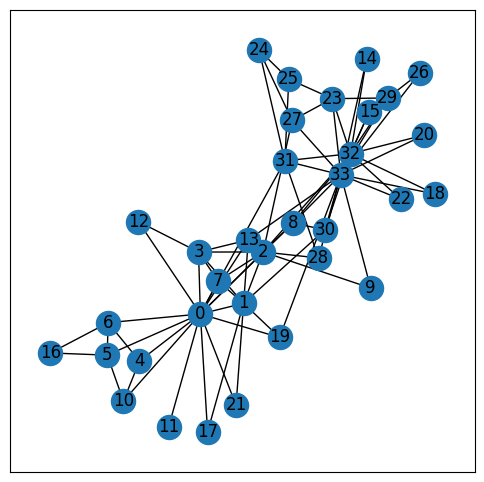

In [3]:
plt.figure(figsize = (6,6))
nx.draw_networkx(G,
                 pos = pos) 
plt.savefig('空手道俱乐部图.svg')

In [4]:
L = nx.laplacian_matrix(G).todense()
# 拉普拉斯矩阵

lambdas,V = np.linalg.eig(L)
# 特征值分解

# 按特征值有小到大排列
lambdas_sorted = np.sort(lambdas)
V_sorted = V[:, lambdas.argsort()]

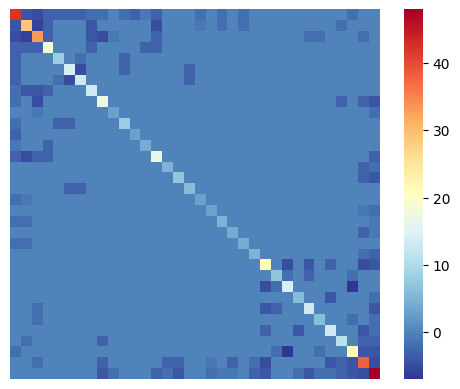

In [5]:
sns.heatmap(L,cmap = 'RdYlBu_r',
            square = True, 
            xticklabels = [], yticklabels = [])
plt.savefig('L热图.svg')

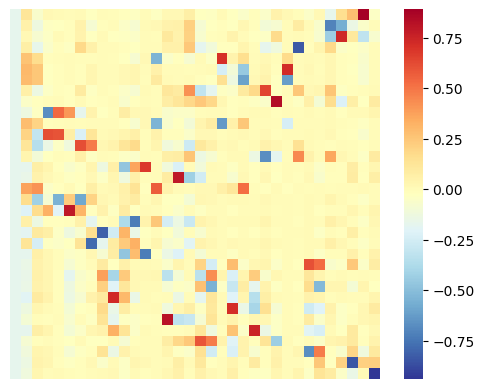

In [6]:
sns.heatmap(V_sorted,cmap = 'RdYlBu_r',
            square = True,
            xticklabels = [], yticklabels = [])
plt.savefig('V热图.svg')

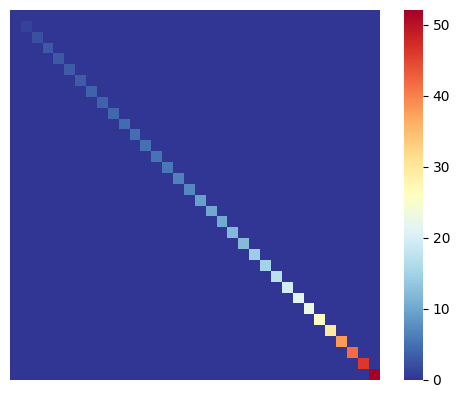

In [7]:
sns.heatmap(np.diag(lambdas_sorted),
            cmap = 'RdYlBu_r',square = True,
            xticklabels = [], yticklabels = [])
plt.savefig('lambda热图.svg')

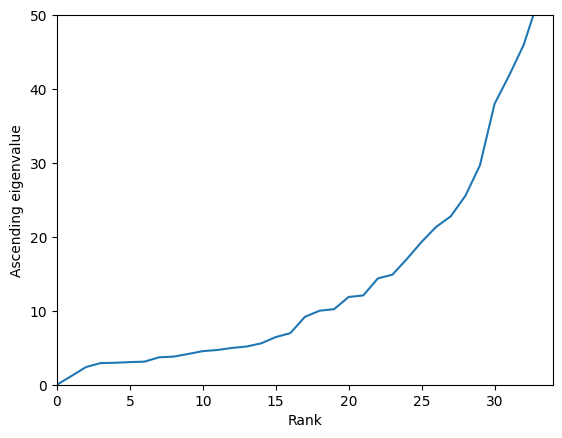

In [8]:
plt.plot(range(0,34),lambdas_sorted)
plt.ylabel('Ascending eigenvalue')
plt.xlabel('Rank')
plt.xlim(0,34)
plt.ylim(0,50)
plt.savefig('特征值线图.svg')

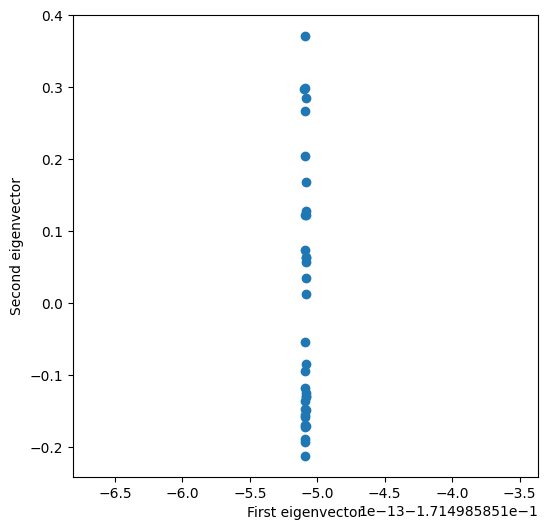

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(V_sorted[:,0],V_sorted[:,1])
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.savefig('特征向量散点图.svg')

In [11]:
# 聚类标签
colors = [ "r" for i in range(0,34)] 
for i in range(0,34):
    if (V_sorted[i,1] < 0):
        colors[i] = "b"

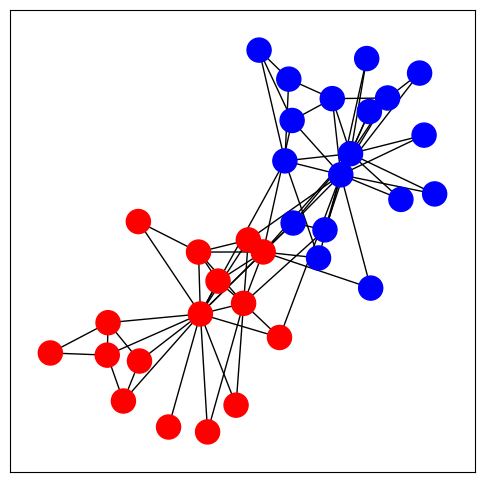

In [13]:
plt.figure(figsize = (6,6))
nx.draw_networkx(G,pos,
                 # with_labels = False,
                 node_color=colors)
plt.savefig('图节点聚类.svg')